# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

Text(0.5, 1.0, 'Total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type')

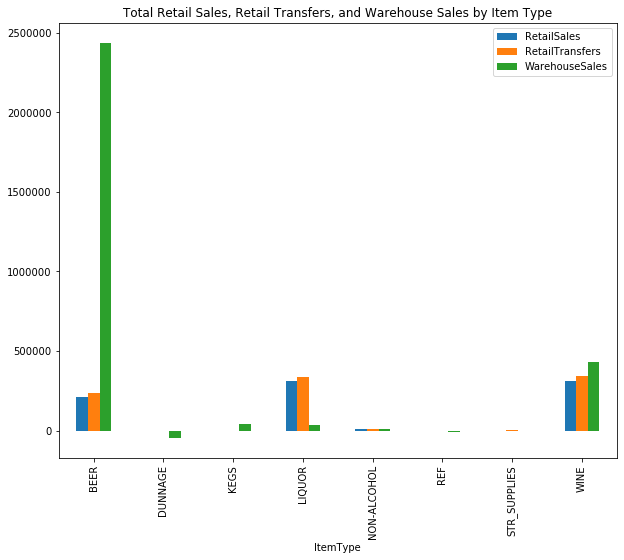

In [55]:
# Creamos una tabla con los datos requeridos y la agrupamos
df = data[['ItemType', 'RetailSales', 'RetailTransfers', 'WarehouseSales']].groupby(['ItemType']).sum()

# Creamos el gráfico
df.plot.bar(figsize = (10,8))
plt.title("Total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type")

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [24]:
# Crear una nueva columna con las ventas totales
data['Total_sales'] = data[['RetailSales', 'RetailTransfers', 'WarehouseSales']].sum(axis=1)
data

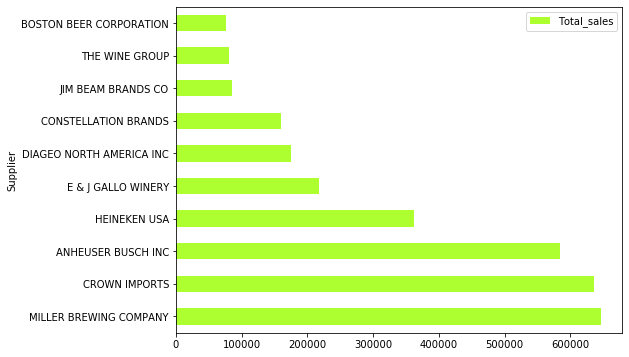

In [53]:
# Agrupar por suppliers
df_sup = (data[['Total_sales']].groupby(data['Supplier']).sum()).sort_values(by= 'Total_sales', ascending=False)[:10]
df_sup
# Crear el gráfico
df_sup.plot.barh(figsize = (8,6), color='greenyellow')


## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [57]:
# Crear el dataset que agrupe las medias mensuales
df_mean = data[['Month', 'RetailSales', 'RetailTransfers', 'WarehouseSales']].groupby(['Month']).mean()
df_mean

,RetailSales,RetailTransfers,WarehouseSales
Month,,,
1,5.679413,5.574833,19.072137
2,5.939247,6.050136,20.229658
4,0.000000,15.707503,0.000000
5,7.038838,7.421817,27.310548
6,7.143914,6.950396,27.839069
8,6.409991,6.584726,28.122641
9,6.757254,6.419721,22.817909
10,6.549021,6.827827,22.289367
11,6.765496,7.103699,23.348862


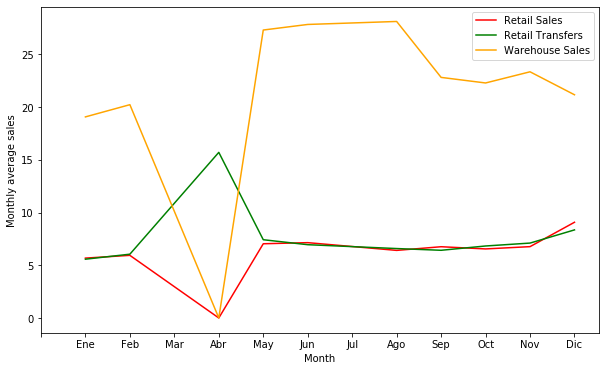

In [88]:
# Ploteamos la serie
fig = plt.figure(figsize=(10,6))
plt.plot(df_mean.RetailSales, color = 'red')
plt.plot(df_mean.RetailTransfers, color = 'green')
plt.plot(df_mean.WarehouseSales, color = 'orange')
plt.xticks([i for i in range(13)], ['','Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
plt.xlabel('Month')
plt.ylabel('Monthly average sales')
plt.legend(('Retail Sales', 'Retail Transfers', 'Warehouse Sales'))

## 4. Plot the same information as above but as a bar chart.

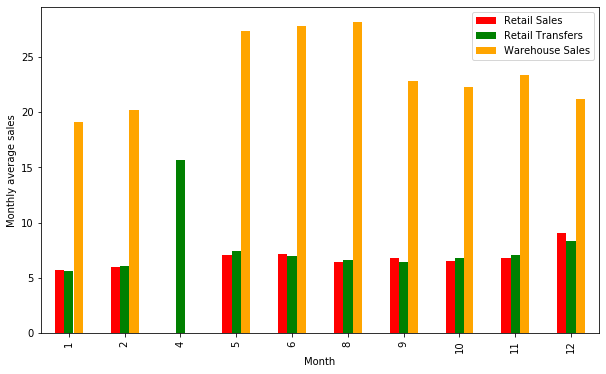

In [90]:
df_mean.plot.bar(figsize=(10,6), color=['red', 'green', 'orange'])
plt.ylabel('Monthly average sales')
plt.legend(('Retail Sales', 'Retail Transfers', 'Warehouse Sales'))

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [138]:
# Crear el dataset 
df_retail = data[['Year','Month', 'RetailSales', 'ItemType']].groupby(['Year','Month', 'ItemType']).sum()
df_retail


RetailSales
Year Month ItemType                 
2017 4     BEER                 0.00
           LIQUOR               0.00
           NON-ALCOHOL          0.00
           REF                  0.00
           STR_SUPPLIES         0.00
...                              ...
2018 2     LIQUOR           28852.31
           NON-ALCOHOL        812.84
           REF                 41.52
           STR_SUPPLIES        47.76
           WINE             29409.39

[73 rows x 1 columns]

Text(0.5, 1.0, 'Retail sales over time by item type')

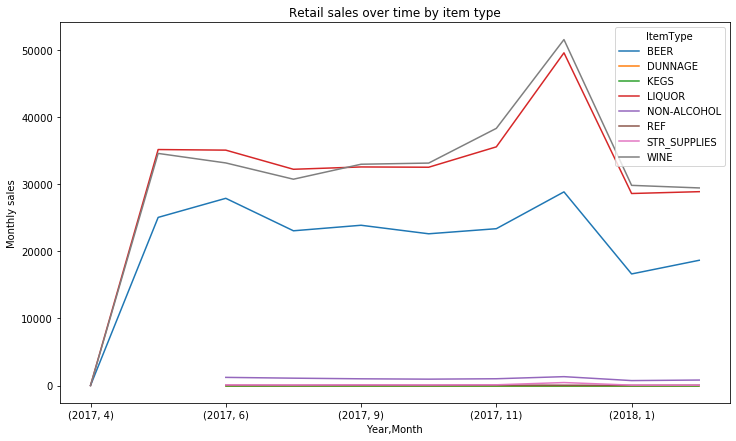

In [146]:
# Crear la figura
fig,ax= plt.subplots(figsize=(12,7))
# Plotearla
df_retail.unstack('ItemType')['RetailSales'].plot(ax=ax)
plt.ylabel('Monthly sales')

plt.title('Retail sales over time by item type')

# FUENTES: 
# https://github.com/scentellegher/code_snippets/blob/master/pandas_groupby_unstack/Plot_groupby_multiple_columns_unstack.ipynb
# https://stackoverflow.com/questions/52545073/plot-a-grouped-by-data-frame

## 6. Plot the same information as above but as a bar chart.

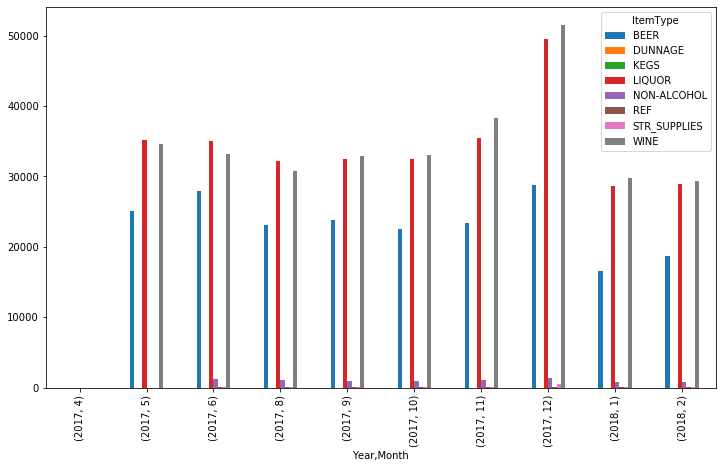

In [142]:
# Crear la figura
fig,ax= plt.subplots(figsize=(12,7))
df_retail.unstack('ItemType')['RetailSales'].plot.bar(ax=ax)

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

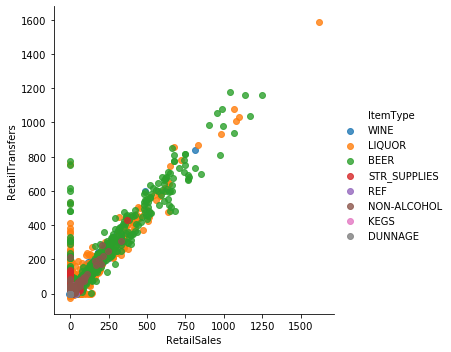

In [148]:
sns.lmplot(x="RetailSales", y="RetailTransfers", hue="ItemType", data=data, fit_reg=False)

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

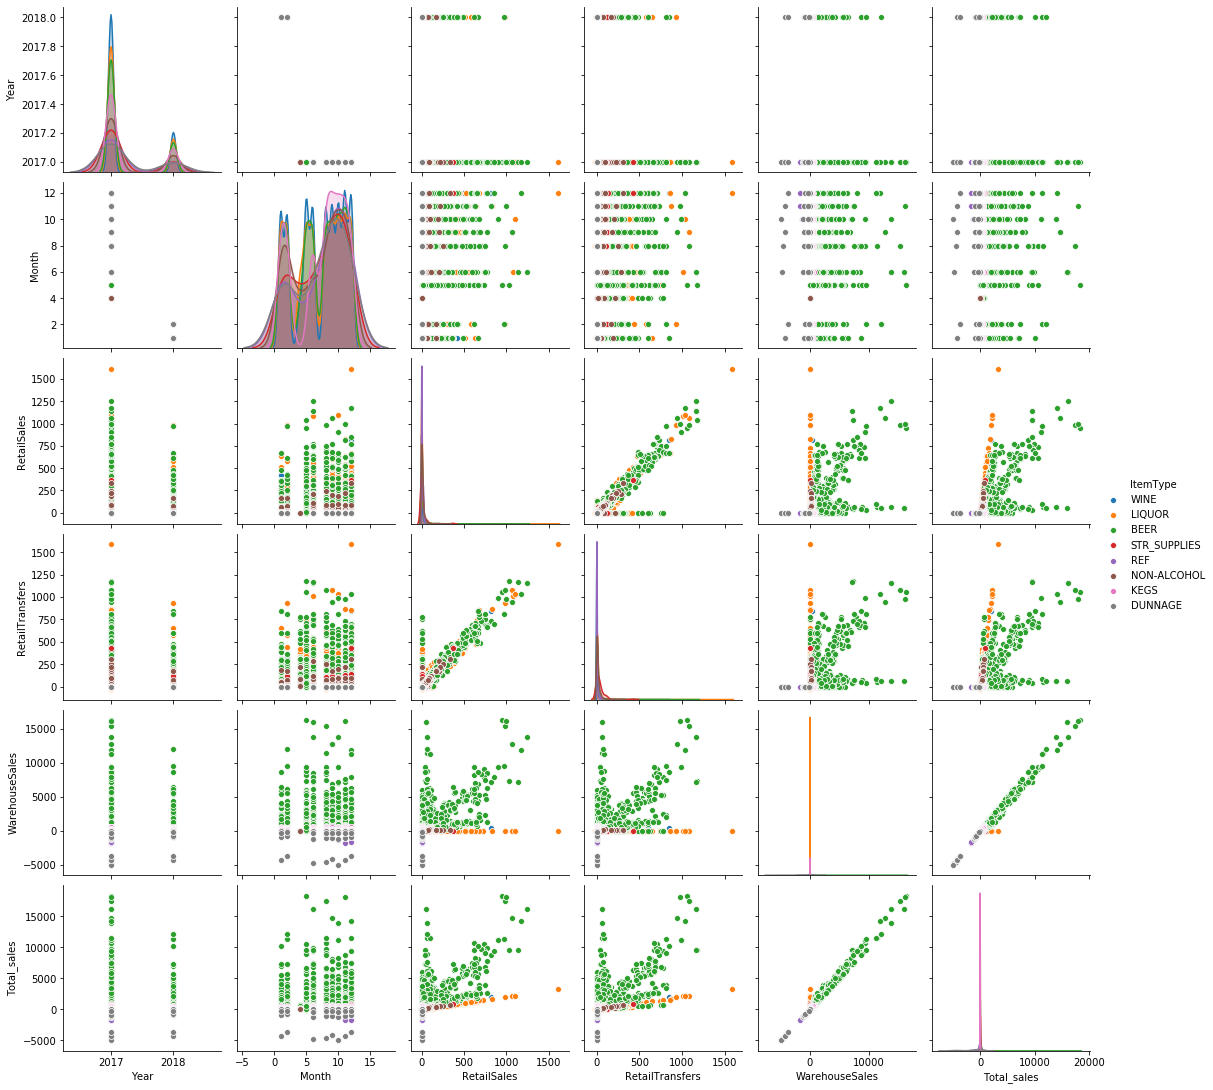

In [149]:
sns.pairplot(data, hue="ItemType")